# Машинное обучение "без учителя". Задача кластеризации. 

В практических примерах ниже показано:   

* как пользоваться инструментами визуального анализа для предварительной интерпретации кластеров 
* как проводить кластерный анализ 
* как строить прогноз принадлежности к кластерам новых наблюдений
* как оценивать точность кластеризации

*Модели*: иерархический и неиерархический кластерный анализ

*Данные*: load_breast_cancer

### Импорт пакетов

In [1]:
import numpy as np
import pandas as pd
# процедура стандартизации
from sklearn.preprocessing import StandardScaler
# алгоритм k-средних
from sklearn.cluster import KMeans
# алгоритм k-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# дендрограмма
from scipy.cluster.hierarchy import dendrogram, linkage
# дендрограмма, расчет матрицы расстояний
from scipy.spatial.distance import pdist
# метрики
from sklearn import metrics 
# кластерные силуэты
from matplotlib import cm 
from sklearn.metrics import silhouette_samples
from matplotlib import pyplot as plt
import seaborn
seaborn.set_theme()
from sklearn.datasets import load_breast_cancer 
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

Данные в примере:
* **mean radius** - средний радиус
* **mean texture** - средняя текстура
* **mean perimeter** - средний периметр
* **mean area** - средняя площадь
* **mean smoothness** - средняя гладкость
* **mean compactness** - средняя компактность
* **mean concavity** - средняя вогнутость
* **mean concave points** - средние вогнутые точки
* **mean symmetry** - средняя симметрия
* **mean fractal dimension** - средняя фрактальная размерность
* **radius error** - ошибка радиуса
* **texture error** - ошибка текстуры
* **perimeter error** - ошибка периметра
* **area error** - ошибка области
* **smoothness error** - ошибка плавности
* **compactness error** - ошибка компактности
* **concavity error** - ошибка вогнутости
* **concave points error** - ошибка вогнутых точек
* **symmetry error** - ошибка симметрии
* **fractal dimension error** - ошибка фрактального измерения
* **worst radius** - наихудший радиус
* **worst texture** - худшая текстура
* **worst perimeter** - худший периметр
* **worst area** - худшая площадь
* **worst smoothness** - наихудшая гладкость
* **worst compactness** - худшая компактность
* **worst concavity** - наихудшая вогнутость
* **worst concave points** - наихудшие вогнутые точки
* **worst symmetry** - наихудшая симметрия
* **worst fractal dimension** - наихудшее фрактальная размерность

Задача состоит в разделении ирисов на группы в зависимости от  показателей "mean radius", "mean fractal dimension".

In [2]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df = df[['mean radius', 'mean fractal dimension']]
df.columns = ['radius', 'fractal dimension']

In [4]:
df

,radius,fractal dimension
0,17.99,0.07871
1,20.57,0.05667
2,19.69,0.05999
3,11.42,0.09744
4,20.29,0.05883
...,...,...
564,21.56,0.05623
565,20.13,0.05533
566,16.60,0.05648
567,20.60,0.07016


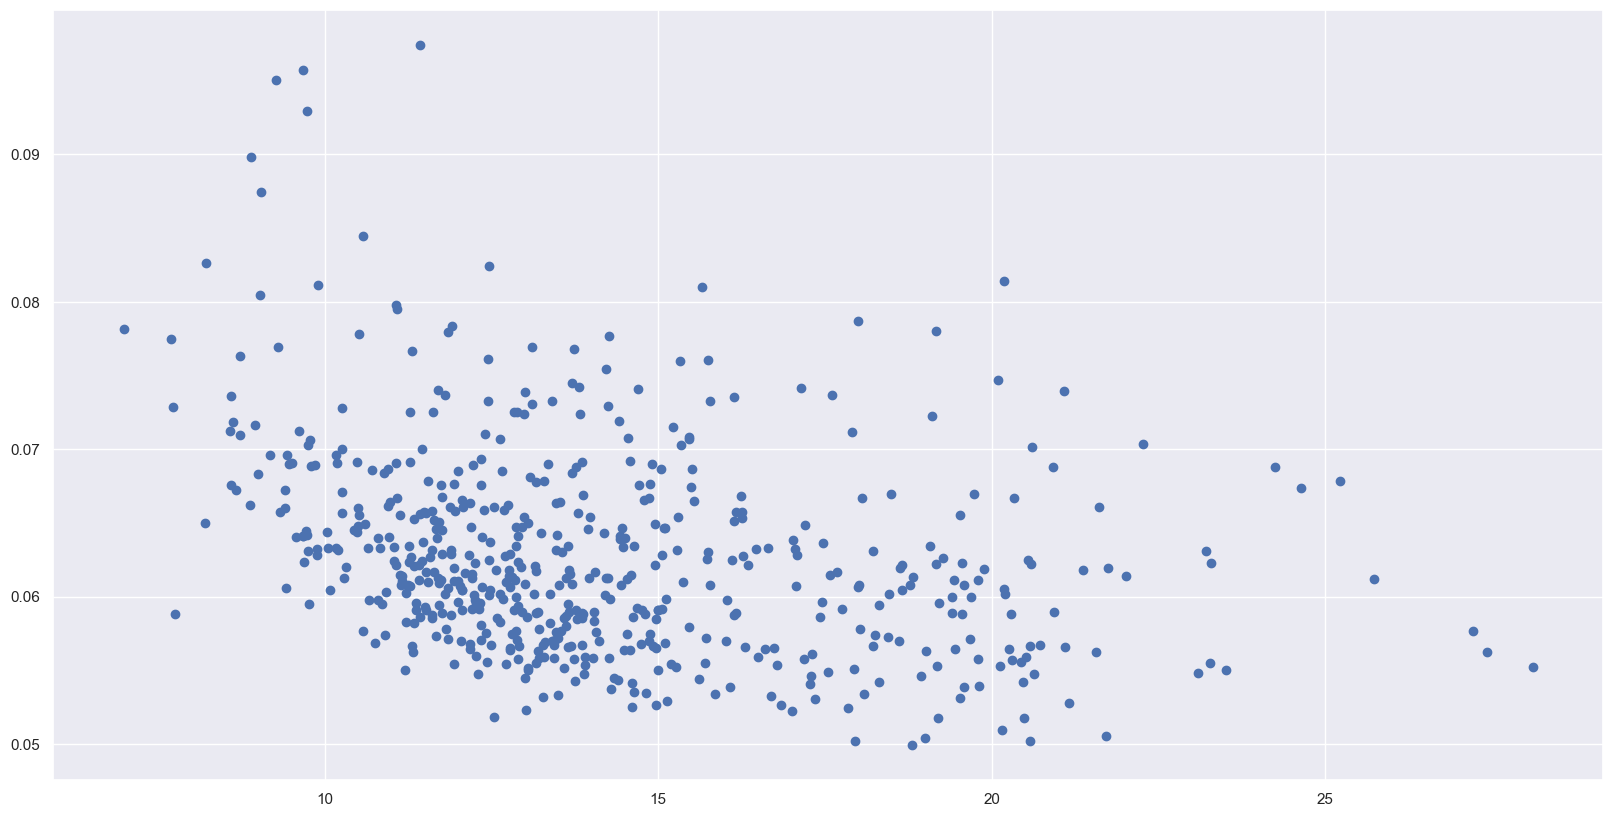

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(df['radius'], df['fractal dimension'])

В нашем примере наблюдения визуально никак не сгруппированы. Но можно предположить, что лучше разделить их на 3 группы. Тем не менее, рассмотрим метод для определения наилучшего количества кластеров.

#### Определение оптимального количества кластеров для метода локтя

Одна из основных трудностей в обучении без учителя состоит в том, что мы не знаем точного ответа. В нашем наборе данных нет 
установленных данных о метках классов, поэтому для количественного определения качества кластеризации нам нужно использовать внутренние метрики - такие как внутрикластерная **SSE** (искажение или инерция):
$$SSE = \sum\limits_{i=1}^n\sum\limits_{j=1}^kw_{ij}(x_i - m_i)^2$$

Здесь $w_{ij}$ = 1, если наблюдение относится к кластеру $j$ и 0 в противоположном случае, а $m_i$ - центроид кластера.

Основываясь на внутрикластерной SSE, мы можем применить графический инструмент, так называемый метод локтя, для оценки оптимального числа k кластеров для поставленной задачи. Интуитивно мы можем сказать, что если k увеличивается, то искажение уменьшается. Это вызвано тем, что образцы будут ближе к центроидам, которым они назначены. В основе метода локтя лежит идея, которая состоит в том, чтобы идентифицировать значение k в точке, где искажение начинает увеличиваться быстрее всего, что станет понятнее, если мы построим график искажения для разных значений k.

Text(0, 0.5, 'Искажение ')

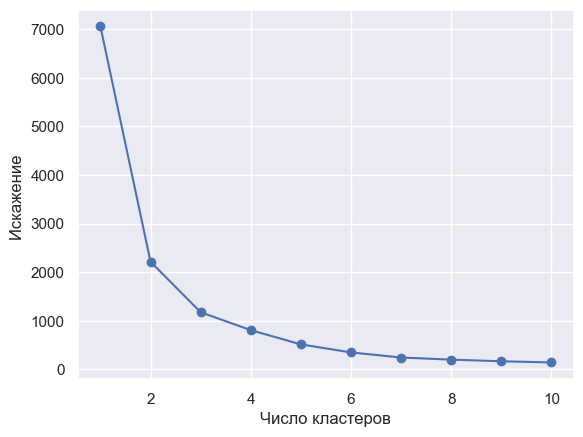

In [6]:
distortions = [] 
for i in range (1, 11): 
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10 , 
                max_iter=300, 
                random_state=0) 
    km.fit(df)
    distortions.append(km.inertia_) 
plt.plot(range(1, 11) , distortions , marker='o') 
plt.xlabel('Чиcлo кластеров') 
plt.ylabel ('Искажение ' ) 

Как видно на графике выше, локоть расположен в k = 4, что свидетельствует о том, что k = 4 является хорошим выбором для этого набора данных.

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


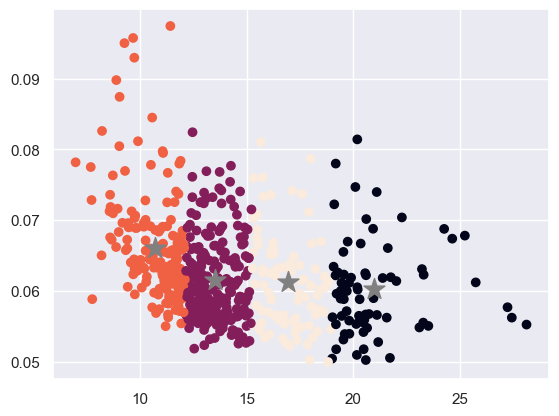

In [11]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(df.values)
plt.scatter(df['radius'], df['fractal dimension'], c=kmeans.labels_)
# нарисуем центроиды
plt.scatter(kmeans.cluster_centers_ [:, 0], kmeans.cluster_centers_ [:, 1], 
           s=250, marker= '*', c = 'grey', label = 'центроиды')

Видим, что каждая группа точек покрашена в цвет соответствующего кластера, а центроиды расположены внутри множества точек. Тем не менее, попробуем оценить качество кластеризации в обоих вариантах.

#### Количественная оценка качества кластеризации


Задача оценки качества кластеризации является более сложной по сравнению с оценкой качества классификации. Во-первых, такие оценки не должны зависеть от самих значений меток, а только от самого разбиения выборки. Во-вторых, не всегда известны истинные метки объектов, поэтому также нужны оценки, позволяющие оценить качество кластеризации, используя только неразмеченную выборку.

Выделяют *внешние* и *внутренние* метрики качества. Внешние используют информацию об истинном разбиении на кластеры, в то время как внутренние метрики не используют никакой внешней информации и оценивают качество кластеризации, основываясь только на наборе данных. Оптимальное число кластеров обычно определяют с использованием внутренних метрик.

Еще одна внутренняя метрика для оценки качества кластеризации (наряду с **SSE**) представлена силуэтным анализом
Силуэтный анализ может использоваться в качестве графического инструмента для построения графика меры плотности группировки образцов в кластерах. 
Чтобы вычислить силуэтный коэффициент наблюдения в нашем наборе данных, можно применить следующие три шага. 
1. Вычислить *внутриклассовую связность* $a_i$ как среднее расстояние между наблюдением и другими точками кластера
2. Вычислить *межкластерное разделение* $b_i$ от следующего ближайшего кластера как среднее расстояние между наблюдением $х_i$ и всеми наблюдениями в ближайшем кластере
3. Вычислить *силуэт* $s_i$:
$$s_i = (b_i - a_i)/\max(b_i,a_i).$$

$s_i$ принимает значения в диапазоне $[-1, 1]$. Идеальное совпадение - когда $s_i = 1.$

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Средний коэффициент силуэта --  0.5483318975876682


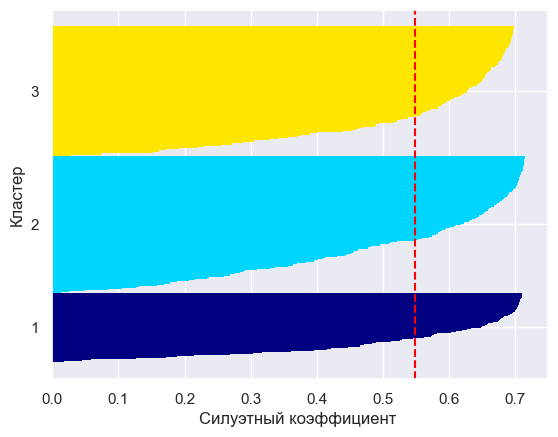

In [12]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(df.values)
# метки кластеров для каждого наблюдения
y_km = kmeans.fit_predict(df) 

cluster_labels = np.unique(y_km) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(df, y_km, metric='euclidean')

# изобразим график силуэтов
y_ax_lower , y_ax_upper = 0, 0 
yticks = [] 
for i, c in enumerate(cluster_labels): 
    c_silhouette_vals = silhouette_vals[y_km == c] 
    c_silhouette_vals.sort() 
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals , 
             height=1.0, 
             edgecolor='none', 
             color=color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2) 
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals) 
    
plt.axvline(silhouette_avg, color= "red", linestyle="--" ) 
print ("Средний коэффициент силуэта -- ", silhouette_avg)
plt.yticks(yticks, cluster_labels + 1) 
plt.ylabel ('Кластер') 
plt.xlabel('Силуэтный коэффициент ' ) 
plt.show() 

Средний коэффициент силуэта весьма близок к 0.55 , что говорит о относительным качестве кластеризации.
Если силуэты зрительно значительно отличаются друг от друга по длине, то это является признаком *субоптимальной* кластеризации. Как правило, в этом случае центроиды кластеров стоят отдельно от множества точек кластера. 
Посчитаем средний коэффициент силуэта для кластеризации $k=4$. 

In [20]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(df.values)
# метки кластеров для каждого наблюдения
y_km = kmeans.fit_predict(df)

silhouette_vals = silhouette_samples(df, y_km, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals) 

print ("Средний коэффициент силуэта -- ", silhouette_avg)

Средний коэффициент силуэта --  0.515687459695231


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Его значение немного ниже, чем в предыдущем случае. Формально $k=3$ - более оптимальное разбиение.

#### Сравнение результатов на обучающей и тестовой выборке
Посмотрим, как прогнозировать новых наблюдений принадлежность к кластерам, построенным по обучающим данным. Сравним значения средних силуэтных коэффициентов.

В обучающей выборке - 80% исходных наблюдений.

In [21]:
DF = pd.DataFrame(data.data, columns=data.feature_names)
DF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Добавляем к выборке дополнительный показатель.

In [22]:
DF = DF[['mean radius', 'mean fractal dimension', 'mean symmetry']]
DF.columns = ['radius', 'fractal dimension', 'symmetry']
DF

,radius,fractal dimension,symmetry
0,17.99,0.07871,0.2419
1,20.57,0.05667,0.1812
2,19.69,0.05999,0.2069
3,11.42,0.09744,0.2597
4,20.29,0.05883,0.1809
...,...,...,...
564,21.56,0.05623,0.1726
565,20.13,0.05533,0.1752
566,16.60,0.05648,0.1590
567,20.60,0.07016,0.2397


In [23]:
DF_train = DF.sample(frac=0.8)

# данные для прогнозов
DF_predict = DF.drop(DF_train.index)

Text(0, 0.5, 'Искажение ')

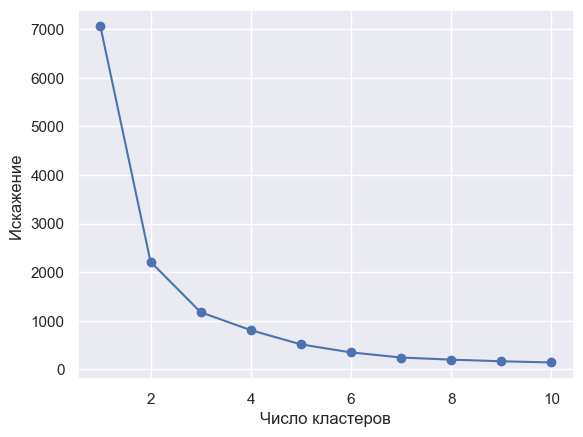

In [24]:
distortions = [] 
for i in range (1, 11): 
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10 , 
                max_iter=300, 
                random_state=0) 
    km.fit(DF)
    distortions.append(km.inertia_) 
plt.plot(range(1, 11) , distortions , marker='o') 
plt.xlabel('Чиcлo кластеров') 
plt.ylabel ('Искажение ' ) 

Как видно на графике выше, заметных изменений не обнаружилось.

Обучаем алгоритм и считаем средний силуэтный коэффициент.

In [25]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(DF_train.values)
y_km_train = kmeans.fit_predict(DF_train) 
silhouette_vals = silhouette_samples(DF_train, y_km_train, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals) 
print ("Средний коэффициент силуэта -- ", silhouette_avg)

Средний коэффициент силуэта --  0.5503935213155396


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
y_km_predict = kmeans.fit_predict(DF_predict) 
silhouette_vals = silhouette_samples(DF_predict, y_km_predict, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals) 
print ("Средний коэффициент силуэта -- ", silhouette_avg)

Средний коэффициент силуэта --  0.5372665596070236


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Применяем модель к новым данным. Значение среднего силуэтного коэффициента незначительно ухудшилось.

#### Статистический анализ получившихся кластеров

In [27]:
# снова работаем со всей выборкой
# добавляем метки кластеров в качестве нового столбца к фрейму
kmeans = KMeans(n_clusters=3,random_state=0).fit(DF.values)
DF["KM"] = kmeans.fit_predict(DF) 

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


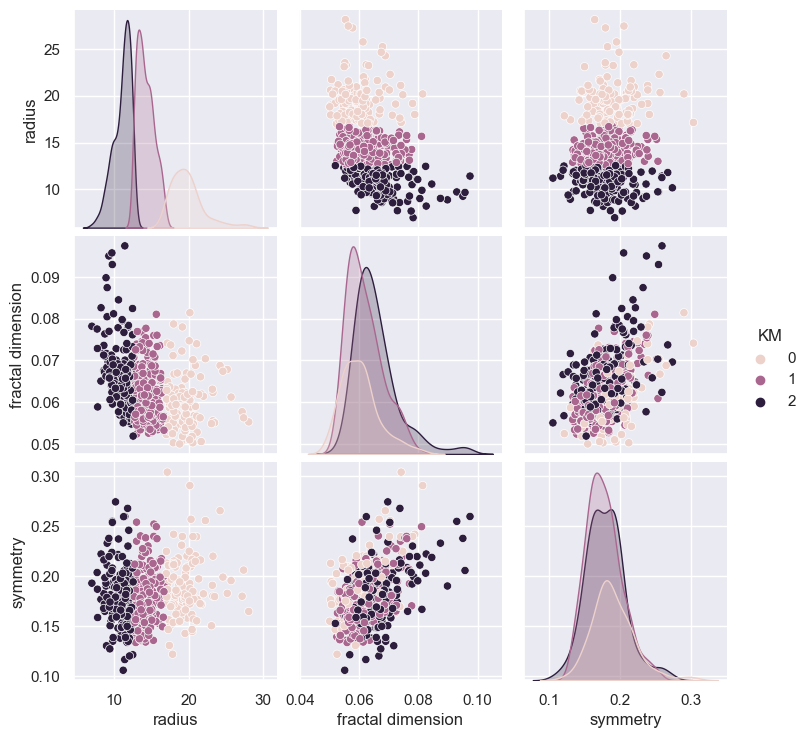

In [28]:
seaborn.pairplot(DF, hue='KM')
plt.show()

Визуально  кластеры  немного отличаются друг от друга. По диаграммам разброса видно, что все три кластера образуют не совсем плотное множество точек, разбиение нестрогое.

In [49]:
from sklearn.metrics import accuracy_score
kmeans = KMeans(n_clusters=3, random_state=0)

# Обучение модели на данных
kmeans.fit(df)
preds = kmeans.predict(df)

# Получение фактического разбиения на группы из колонки "target" в исходном датасете
actual = data.target

# Расчет метрики Acc
acc = accuracy_score(actual, preds)

print(f"Accuracy: {acc}")

Accuracy: 0.46221441124780316


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Из оценки кластеризации следует, что алгоритм (при разбиении на 3 кластера) достиг высокой точности в своей работе по сравнению с другими вариантами кластеризации.

In [53]:
kmeans = KMeans(n_clusters=2, random_state=0)

# Обучение модели на данных
kmeans.fit(DF)
preds = kmeans.predict(DF)

# Получение фактического разбиения на группы из колонки "target" в исходном датасете
actual = data.target

# Расчет метрики Acc
acc = accuracy_score(actual, preds)

print(f"Accuracy: {acc}")

Accuracy: 0.8541300527240774


C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Из оценки кластеризации следует, что алгоритм (при разбиении на 2 кластера) достиг высокой точности в своей работе, указывая правильную категоризацию большинства объектов данных.